### Libraries

In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist #to load dataset
from keras.utils import to_categorical
from keras import Input, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D
import visualkeras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import seaborn as sns

### Dataset loading

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() 

### Train - test basic info

In [ ]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
Y_train, Y_test

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

### Data preprocessing

In [ ]:
#Normalization

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#Categorization

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

### Creating models and layers

In [ ]:
input_shape=(28,28)

In [ ]:
#Sequential class

model_seq = tf.keras.models.Sequential([
    Flatten(input_shape=input_shape),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [ ]:
#Model class

input = Input(input_shape)
X = Flatten()(input)
X = Dense(128, activation='relu')(X)
X = Dropout(0.2)(X)
output = Dense(10, activation='softmax')(X)

model = Model(input, output)


In [ ]:
#CNN with model class

input2 = Input(input_shape)
X = Conv1D(16, kernel_size=3, activation='relu')(input2)
X = Conv1D(32, 3, activation='relu')(X)
X = MaxPooling1D(3)(X)
X = Conv1D(32, 3, activation='relu')(X)
X = Conv1D(16, 3, activation='relu')(X)
X = GlobalMaxPooling1D()(X)
X = Dropout(0.2)(X)
output2 = Dense(10, activation='softmax')(X)

model_cnn = Model(input2, output2)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_cnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 conv1d (Conv1D)             (None, 26, 16)            1360      
                                                                 
 conv1d_1 (Conv1D)           (None, 24, 32)            1568      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 8, 32)            0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 32)             3104      
                                                                 
 conv1d_3 (Conv1D)           (None, 4, 16)             1552      
                                                           

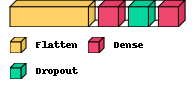

In [ ]:
# Visualization
visualkeras.layered_view(model_seq, legend=True)

### Model configuration

In [ ]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_cnn.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model fitting

In [ ]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 5s 10ms/step - loss: 0.4459 - accuracy: 0.8735 - val_loss: 0.2158 - val_accuracy: 0.9395
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.2169 - accuracy: 0.9366 - val_loss: 0.1599 - val_accuracy: 0.9543
Epoch 3/10
375/375 [==============================] - 6s 17ms/step - loss: 0.1642 - accuracy: 0.9525 - val_loss: 0.1344 - val_accuracy: 0.9599
Epoch 4/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1338 - accuracy: 0.9613 - val_loss: 0.1117 - val_accuracy: 0.9682
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1136 - accuracy: 0.9668 - val_loss: 0.1023 - val_accuracy: 0.9698
Epoch 6/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0973 - accuracy: 0.9713 - val_loss: 0.0956 - val_accuracy: 0.9718
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0853 - accuracy: 0.9744 - val_loss: 0.0886 - val_accuracy: 0.9732

In [ ]:
history_cnn = model_cnn.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 7s 16ms/step - loss: 1.1572 - accuracy: 0.6117 - val_loss: 0.3547 - val_accuracy: 0.9069
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 0.4854 - accuracy: 0.8486 - val_loss: 0.2081 - val_accuracy: 0.9410
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.3451 - accuracy: 0.8903 - val_loss: 0.1596 - val_accuracy: 0.9515
Epoch 4/10
375/375 [==============================] - 6s 16ms/step - loss: 0.2920 - accuracy: 0.9087 - val_loss: 0.1338 - val_accuracy: 0.9600
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 0.2546 - accuracy: 0.9215 - val_loss: 0.1226 - val_accuracy: 0.9638
Epoch 6/10
375/375 [==============================] - 6s 15ms/step - loss: 0.2316 - accuracy: 0.9291 - val_loss: 0.1123 - val_accuracy: 0.9665
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 0.2140 - accuracy: 0.9357 - val_loss: 0.1102 - val_accuracy: 0.9657

### Evaluation

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.9763


[0.07500375807285309, 0.9763000011444092]

In [ ]:
model_cnn.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0852 - accuracy: 0.9732


[0.0851968303322792, 0.9732000231742859]

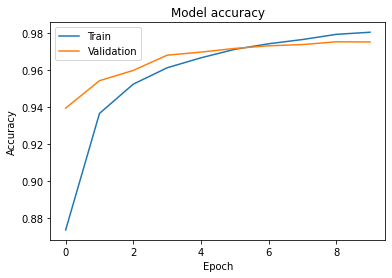

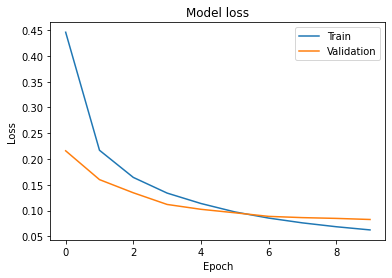

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

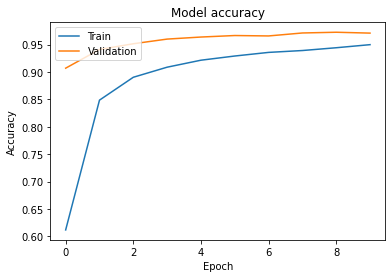

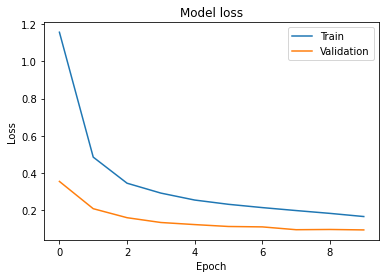

In [ ]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

313/313 [==============================] - 1s 3ms/step
Accuracy: 0.9763
Precision: 0.9761399798967225
Recall: 0.976219655443716
F1 Score: 0.9761347171081673


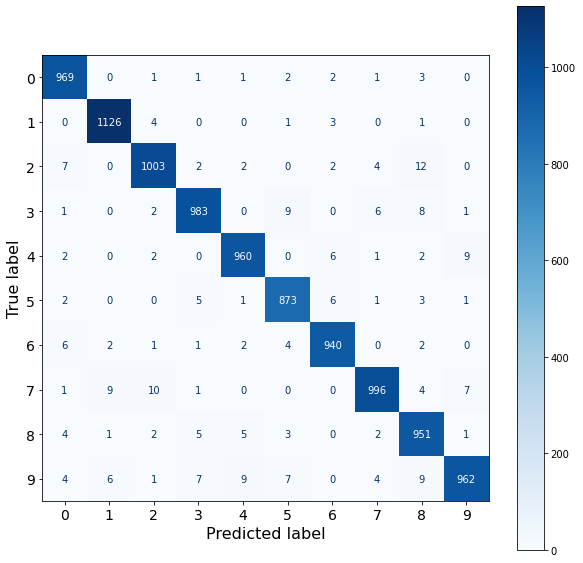

In [ ]:
Y_pred = model.predict(X_test, verbose=1)
Y_pred = np.argmax(Y_pred, axis=1)
Y_test_cal = np.argmax(Y_test, axis=1)

accuracy = accuracy_score(Y_test_cal, Y_pred)
precision = precision_score(Y_test_cal, Y_pred, average='macro')
recall = recall_score(Y_test_cal, Y_pred, average='macro')
f1 = f1_score(Y_test_cal, Y_pred, average='macro')
cm = confusion_matrix(Y_test_cal, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

#sns.heatmap(cm, annot=True)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
plt.show()

313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9732
Precision: 0.9734166668525559
Recall: 0.9728666989870829
F1 Score: 0.9730645121408577


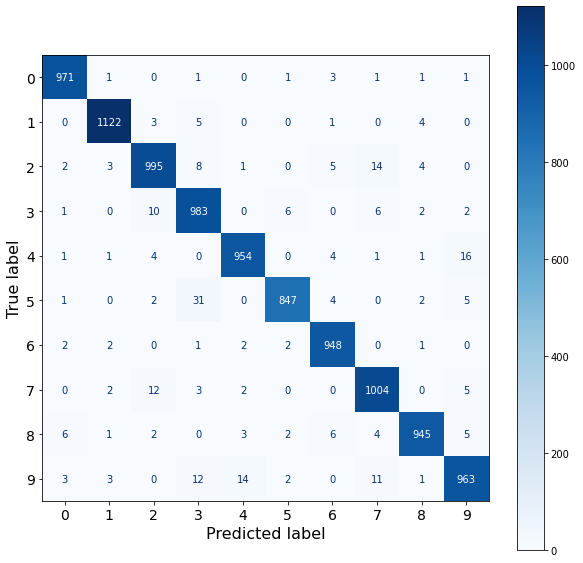

In [ ]:
Y_pred = model_cnn.predict(X_test, verbose=1)
Y_pred = np.argmax(Y_pred, axis=1)
Y_test_cal = np.argmax(Y_test, axis=1)

accuracy = accuracy_score(Y_test_cal, Y_pred)
precision = precision_score(Y_test_cal, Y_pred, average='macro')
recall = recall_score(Y_test_cal, Y_pred, average='macro')
f1 = f1_score(Y_test_cal, Y_pred, average='macro')
cm = confusion_matrix(Y_test_cal, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

#sns.heatmap(cm, annot=True)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
plt.show()